Data sample:
   user  gesture  sequence         x         y         z   time
0     1        0         1  0.623219  0.639005 -0.576136    6.0
1     1        0         1  0.619415  0.647361 -0.573931   37.0
2     1        0         1  0.615745  0.648051 -0.571920   67.0
3     1        0         1  0.609227  0.655674 -0.569943  101.0
4     1        0         1  0.606046  0.650463 -0.568197  132.0


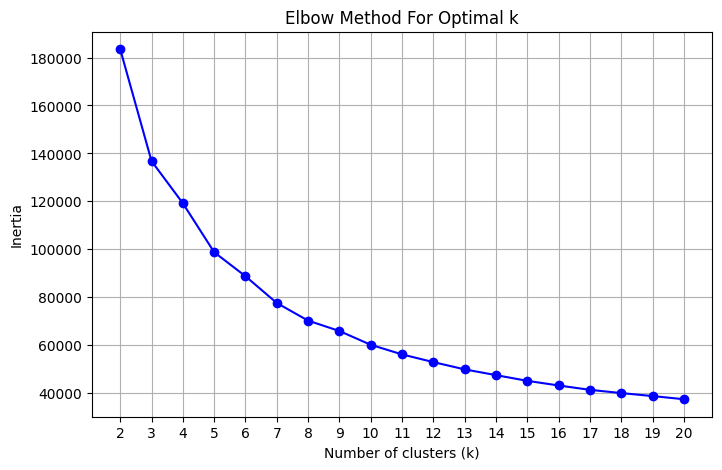


Data sample with cluster assignments (letters):
   user  gesture  sequence         x         y         z   time  \
0     1        0         1  0.623219  0.639005 -0.576136    6.0   
1     1        0         1  0.619415  0.647361 -0.573931   37.0   
2     1        0         1  0.615745  0.648051 -0.571920   67.0   
3     1        0         1  0.609227  0.655674 -0.569943  101.0   
4     1        0         1  0.606046  0.650463 -0.568197  132.0   

   cluster_numeric cluster_letter  
0                8              I  
1                8              I  
2                8              I  
3                8              I  
4                8              I  

Gesture sequences (cluster letters):
Gesture 0: ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your CSV file. Adjust the file path accordingly.
# We assume here that the file has headers. If not, set header=None and assign column names.


standardize, normalize = True, False

if standardize:
    df = pd.read_csv(r"C:\Users\RS10\Downloads\Standardize.csv")

if normalize:
    df = pd.read_csv(r"C:\Users\RS10\Downloads\Normalize.csv")

# For example, we assume the CSV columns are arranged as follows:
# Column 0: x coordinate, Column 1: gesture id (number drawn), Column 2: y coordinate, Column 3: z coordinate.
if len(df.columns) >= 4:
    df.rename(columns={df.columns[1]: 'gesture',
                       df.columns[3]: 'x',
                       df.columns[4]: 'y',
                       df.columns[5]: 'z'}, inplace=True)
else:
    raise ValueError("The CSV file must have at least 4 columns.")

print("Data sample:")
print(df.head())

# Extract the 3D points (x, y, z)
all_points = df[['x', 'y', 'z']].values

# ----------------------
# Elbow Method Plot
# ----------------------
# Define a range of possible k values, e.g., from 2 to 20.
ks = range(2, 21)
inertias = []

# Compute inertia (within-cluster sum-of-squares) for each k.
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_points)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph.
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(ks)
plt.grid(True)
plt.show()

# ----------------------
# Clustering with the Chosen k
# ----------------------
# After inspecting the elbow graph, select an optimal k value.
# For demonstration, we'll use k = 10 (adjust based on your elbow plot).
optimal_k = 20
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_numeric'] = kmeans_optimal.fit_predict(all_points)

# Map numeric labels to letters.
# Note: This maps 0 -> 'A', 1 -> 'B', etc.
# Ensure that optimal_k <= 26 or adjust as needed.
label_to_letter = {i: chr(65 + i) for i in range(optimal_k)}
df['cluster_letter'] = df['cluster_numeric'].map(label_to_letter)

print("\nData sample with cluster assignments (letters):")
print(df.head())

# ----------------------
# Grouping by Gesture
# ----------------------
# Assuming the "gesture" column has the drawn digit (or any identifier for each gesture),
# group the cluster letter sequence by gesture.
gesture_sequences = df.groupby('gesture')['cluster_letter'].apply(list).to_dict()

# Print the sequences for each gesture.
print("\nGesture sequences (cluster letters):")
for gesture_id, sequence in gesture_sequences.items():
    print(f'Gesture {gesture_id}: {sequence}')

print(gesture_sequences[0])


In [ ]:
#Not shorten the string to 1 letter for each cluster

geste_0 = "" 
for i in gesture_sequences[0]:
    geste_0 += i
geste_0 = geste_0.strip()
print(geste_0)

geste_1 = "" 
for i in gesture_sequences[1]:
    geste_1 += i
geste_1 = geste_1.strip()
print(geste_1)

print(len(geste_0), len(geste_1))

geste_liste = []
for gesture_id, sequence in gesture_sequences.items():
    geste_str = ""  # fresh for each sequence
    for i in sequence:
        geste_str += i
    geste_liste.append([gesture_id, geste_str.strip()])

print(geste_liste)
print(len(geste_liste))


In [ ]:
#shorten the string to 1 letter for each cluster

geste_0 = " "
for i in gesture_sequences[0]:
    if i != geste_0[-1]:
        geste_0+= i
geste_0 = geste_0.strip()
print(geste_0)
geste_1 = " " 
for i in gesture_sequences[1]:
    if i != geste_1[-1]:
        geste_1+= i
geste_1 = geste_1.strip()
print(geste_1)
print(len(geste_0),len(geste_1))
geste_liste = []
geste_str = " "
for gesture_id, sequence in gesture_sequences.items():
    for i in sequence:
        if i != geste_str[-1]:
            geste_str+= i
    geste_liste.append([gesture_id,geste_str.strip()])
    geste_str = " "
print(geste_liste)
print(len(geste_liste))
    


INKDSQARIRITNPKDQFARFRITPKDQFRTPKDQFRTPKODQFRCTPKDQFRCTPKODMQFRCTPKPKODMQFRCTJPOMQFRCTJPOMQFRCTJPTJPKODMQFBRTPKOMQFRTPKPTCRFQMDKNPTPKDMQBRTPKPTRBQMDKNPKDMQRTNPKPJTENKNEKDMQFREKETRBFQMDKNEKDMQFRTPKPKDQFRTPTETETEPKDSQFRTPEKDSQFREKEPKDQFRTPKPKDQFRETPKPKDQFRTPKDQFRTPKDQFRTPKDQFRTPKDQFRTPJPOMBCTJPOMBTJPOBTJPOBTJPOBTJPOBTJPOMBTJPOMBTJPOMBRCTJPOMBTJEQMDKNTEQDEQDEKEQDKEQDKNEDKNEQDKNEDKNEQDKEDKNEAGIASGIASGIASGIASGIASGIASGIASGIASGIASGNIASGPJTCBMDOKPJTBMDKPJTBMDKPJTBMDKPJTBMDKPJTBMDOKPJTBMDOPJTBMDOKOKOKOKPJTBMDOKPJTCBMDOKPNGDSQAEGNKDQAEINKDQAEINKDEQEINKDQEINKDQAEINKDQAERITNKDQERITNKDQEREITNKDMQETNGNGDSAGSAGNGSAININGSAIGSAIGSAIGSAIGSAIGSAIGSAIGH
PJTEMQDMQFPTEQDQFPKEDQDQKPNKEDQAFAPKDQPNKEDEQANKDSEANKEDSANKGDSDSANKEDSDSAKPTJTBQMDMQFKPTJTBMQMDMQFKPOMDQKPKOMDQKPKOMDQKDQKPOMDMQKPOMDMQKPKOMDMQGKNPKODQFKNTEQSAPJPTOEMEMDMQFRBPOEDQPOEMQDQKPKEDEQEPJPOMDQPOEMDQPOMDQPOMDQPOMDQPJTOEBMQMDMQFPJPOMDMBPJPOMOBPJPOEBPJPOBMOMBPJOBMOBPJPOMBPJTOBMBPJOMOMBPJPOBGNIEASAGSANGANGSANGASANGSANGSANGSANGSASGSAGNIGASAGNGSAGASAGS

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
from tqdm import tqdm

# Clustering gestures into discrete labels
def quantize_sequences(sequences, n_clusters=20):
    # Flatten all points to fit clustering model
    all_points = np.vstack([point for seqs in sequences.values() for seq in seqs for point in seq])
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(all_points)

    # Replace sequences with cluster labels
    quantized_sequences = {}
    for key, seq_list in sequences.items():
        label_seqs = []
        for seq in seq_list:
            labels = kmeans.predict(seq)
            label_seqs.append("".join(map(chr, labels + 65)))  # Convert to string of letters
        quantized_sequences[key] = label_seqs
    return quantized_sequences

# Levenshtein edit distance
def edit_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = np.zeros((m+1, n+1), dtype=int)
    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if str1[i-1] == str2[j-1] else 1
            dp[i][j] = min(dp[i-1][j-1]+cost, dp[i-1][j]+1, dp[i][j-1]+1)
    return dp[m][n]

# kNN classifier using edit distance
def classify_knn_edit_distance(test_seq, train_set, k=1):
    distances = []
    for label, train_seqs in train_set.items():
        for train_seq in train_seqs:
            dist = edit_distance(test_seq, train_seq)
            distances.append((dist, label))
    distances.sort()
    nearest = [label for _, label in distances[:k]]
    return max(set(nearest), key=nearest.count)


In [5]:

import numpy as np
from tslearn.metrics import dtw
from tslearn.barycenters import dtw_barycenter_averaging
from collections import defaultdict
from tqdm import tqdm

# Prepare sequence data for a single (user, gesture, sequence)
def extract_sequences(df):
    sequences = defaultdict(list)
    for (user, gesture, sequence_id), group in df.groupby(['user', 'gesture', 'sequence']):
        sequence_data = group[['x', 'y', 'z']].to_numpy()
        # Center the sequence
        sequence_data -= np.mean(sequence_data, axis=0)
        sequences[(user, gesture)].append(sequence_data)
    return sequences

# Compute gesture barycenters (averaged gestures) using DBA
def compute_gesture_barycenters(sequences):
    gesture_groups = defaultdict(list)
    for (user, gesture), seq_list in sequences.items():
        gesture_groups[gesture].extend(seq_list)
    
    gesture_barycenters = {}
    for gesture, seqs in gesture_groups.items():
        # Ensure sequences are the same length or pad/trim if needed
        min_len = min(seq.shape[0] for seq in seqs)
        aligned_seqs = [seq[:min_len] for seq in seqs]  # simple alignment
        barycenter = dtw_barycenter_averaging(aligned_seqs)
        gesture_barycenters[gesture] = barycenter
    return gesture_barycenters

# Compute DTW distance between a sequence and each gesture barycenter
def classify_sequence(seq, gesture_barycenters):
    seq -= np.mean(seq, axis=0)  # center the sequence
    min_distance = float('inf')
    predicted_gesture = None
    for gesture, barycenter in gesture_barycenters.items():
        dist = dtw(seq, barycenter)
        if dist < min_distance:
            min_distance = dist
            predicted_gesture = gesture
    return predicted_gesture


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_user_independent_with_conf_matrix(sequences, k=1):
    users = sorted(set(u for u, _ in sequences.keys()))
    accuracies = []
    all_y_true, all_y_pred = [], []

    for test_user in tqdm(users, desc="User-Independent CV"):
        train = {k: v for k, v in sequences.items() if k[0] != test_user}
        test = {k: v for k, v in sequences.items() if k[0] == test_user}

        y_true, y_pred = [], []

        for (user, true_gesture), gesture_sequences in test.items():
            for test_seq in gesture_sequences:
                distances = []
                for (train_user, train_gesture), train_sequences in train.items():
                    for train_seq in train_sequences:
                        dist = dtw(test_seq, train_seq)
                        distances.append((dist, train_gesture))
                distances.sort()
                nearest = [g for _, g in distances[:k]]
                predicted = max(set(nearest), key=nearest.count)
                y_true.append(true_gesture)
                y_pred.append(predicted)

        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

    print("User-Independent Accuracy: {:.2f}% ± {:.2f}".format(
        100*np.mean(accuracies), 100*np.std(accuracies)))

    # Plot confusion matrix
    labels = sorted(set(all_y_true + all_y_pred))
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(xticks_rotation=45, cmap="Blues")
    plt.title("Confusion Matrix (User-Independent CV)")
    plt.show()

    return accuracies

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def evaluate_user_dependent_with_conf_matrix(sequences, k=1, n_splits=5):
    users = sorted(set(u for u, _ in sequences.keys()))
    accuracies = []
    all_y_true, all_y_pred = [], []

    for user in tqdm(users, desc="User-Dependent CV"):
        user_data = {k: v for k, v in sequences.items() if k[0] == user}

        # Flatten (gesture, sequence)
        flat_sequences = []
        for (u, gesture), seq_list in user_data.items():
            for seq in seq_list:
                flat_sequences.append((gesture, seq))

        if len(flat_sequences) < n_splits:
            continue

        gestures = np.array([g for g, _ in flat_sequences])
        data = np.array([s for _, s in flat_sequences], dtype=object)

        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        for train_idx, test_idx in kf.split(data):
            X_train, X_test = data[train_idx], data[test_idx]
            y_train, y_test = gestures[train_idx], gestures[test_idx]

            y_pred = []
            for test_seq in X_test:
                distances = []
                for train_seq, train_gesture in zip(X_train, y_train):
                    dist = dtw(test_seq, train_seq)
                    distances.append((dist, train_gesture))
                distances.sort()
                nearest = [g for _, g in distances[:k]]
                predicted = max(set(nearest), key=nearest.count)
                y_pred.append(predicted)

            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)
            all_y_true.extend(y_test)
            all_y_pred.extend(y_pred)

    if len(all_y_true) == 0:
        print("No predictions to display. Not enough data?")
        return accuracies

    print("User-Dependent Accuracy: {:.2f}% ± {:.2f}".format(
        100 * np.mean(accuracies), 100 * np.std(accuracies)))

    # Plot confusion matrix
    labels = sorted(set(all_y_true + all_y_pred))
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(xticks_rotation=45, cmap="Oranges")
    plt.title("Confusion Matrix (User-Dependent CV)")
    plt.show()

    return accuracies



In [ ]:
sequences = extract_sequences(df)

evaluate_user_independent_with_conf_matrix(sequences, k=1)

User-Independent CV:   0%|          | 0/10 [00:00<?, ?it/s]

User-Dependent CV: 100%|██████████| 10/10 [05:57<00:00, 35.71s/it]


User-Dependent Accuracy: 89.51% ± 5.44


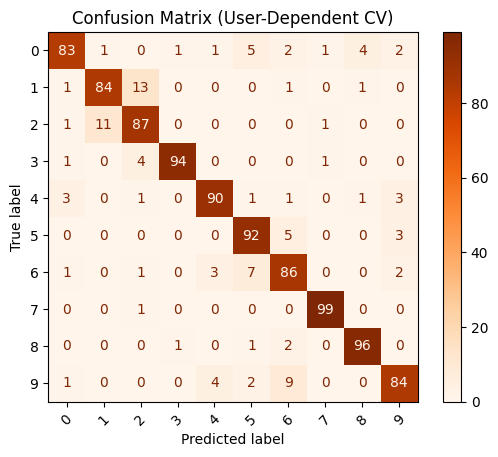

[0.8823529411764706,
 0.8181818181818182,
 0.8484848484848485,
 0.8235294117647058,
 0.7878787878787878,
 0.8787878787878788,
 0.8529411764705882,
 1.0,
 0.8484848484848485,
 0.8823529411764706,
 0.9696969696969697,
 0.9393939393939394,
 0.9117647058823529,
 0.8787878787878788,
 0.8787878787878788,
 0.8823529411764706,
 0.8787878787878788,
 0.8787878787878788,
 0.8235294117647058,
 0.8787878787878788,
 0.8787878787878788,
 0.9705882352941176,
 0.8787878787878788,
 0.9696969696969697,
 1.0,
 0.9393939393939394,
 0.9393939393939394,
 0.8529411764705882,
 0.9090909090909091,
 0.9696969696969697]

In [8]:
sequences = extract_sequences(df)

evaluate_user_dependent_with_conf_matrix(sequences, k=1, n_splits=3)